In [1]:
import cv2
import glob
import torch
import numpy as np
import supervision as sv
from super_gradients.training import models

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
CLASSES = ['product']
CLASSES += [str(i) for i in range(80 - len(CLASSES))]

best_model = models.get(
    "yolo_nas_s",
    num_classes=len(CLASSES),
    checkpoint_path=f"./weights/SKU110K/average_model.pth"
).to(DEVICE)

[2023-08-01 11:53:42] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /home/nitin/sg_logs/console.log


2023-08-01 11:53:43.382673: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 11:53:43.404388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 11:53:43.727078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2023-08-01 11:53:44] INFO - utils.py - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2023-08-01 11:53:44] INFO - utils.py - NumExpr defaulting to 8 threads.
/home/nitin/anaconda3/lib/python3.10/site-packages/

In [2]:
images = glob.glob("SKU110K_fixed/images/test/*")

[2023-08-01 11:54:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


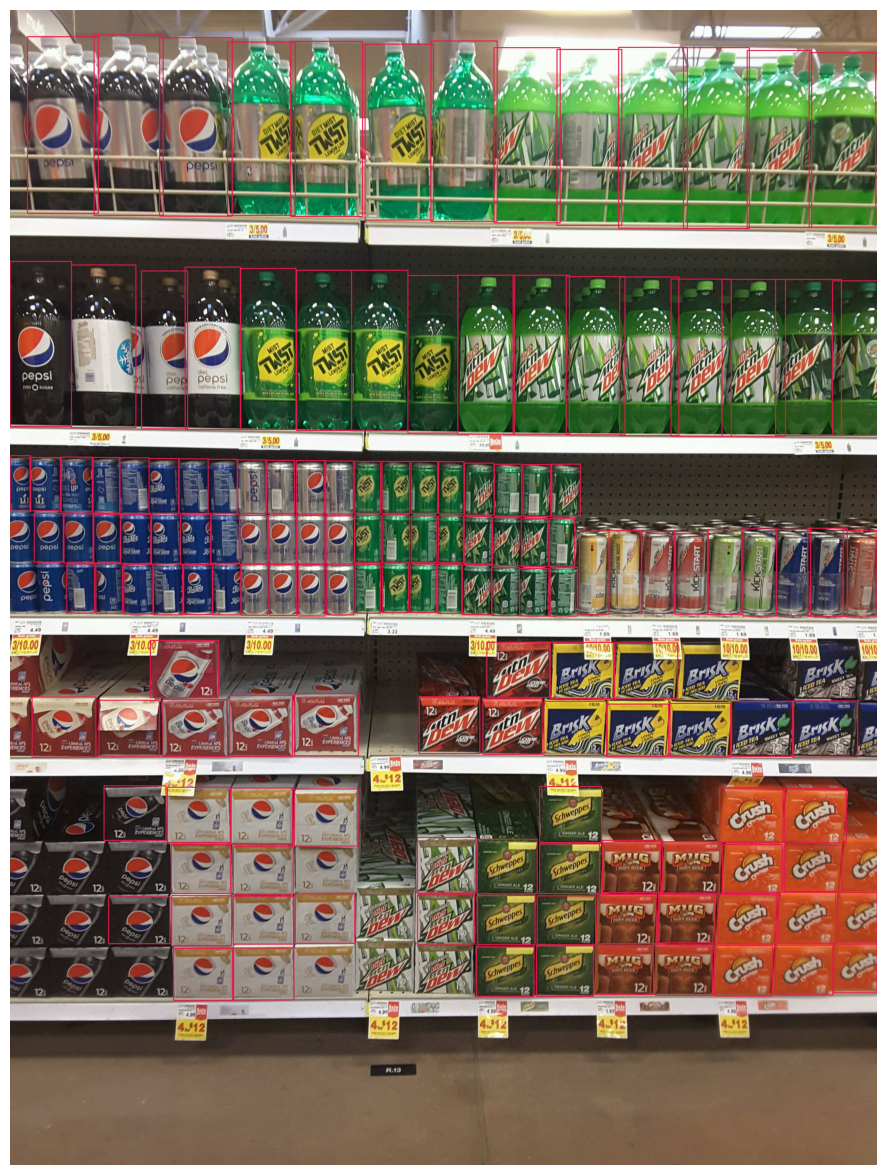

In [6]:
image = cv2.imread(np.random.choice(images))
result = list(best_model.predict(image, conf=0.5))[0]

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    skip_label=True
)

%matplotlib inline
sv.plot_image(annotated_frame, (15, 15))